# IMPORTING LIBRARIES

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings(action= 'ignore')
plt.style.use(['dark_background'])

In [3]:
data = pd.read_csv('advertising.csv')

In [4]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

there is no missing values in the dataset 


# GRAPHICAL VISUALIZATION

histogram is used to visualize the density of the single variable

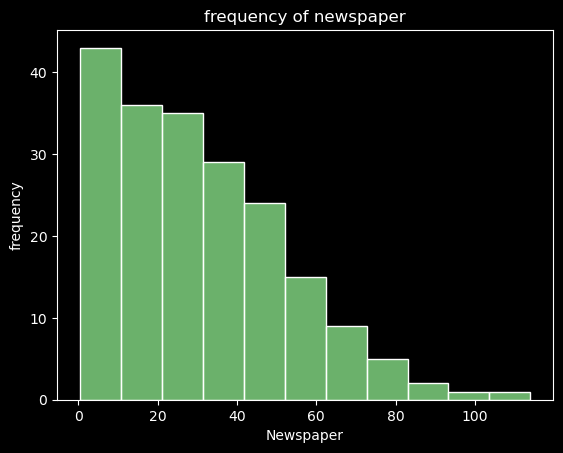

In [11]:
sns.histplot(x = 'Newspaper', data= data, color = 'lightgreen')
plt.xlabel('Newspaper')
plt.ylabel('frequency')
plt.title('frequency of newspaper')
plt.show()

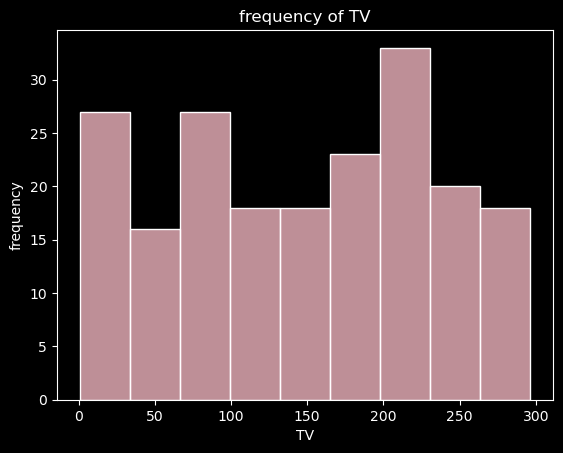

In [29]:
sns.histplot(x = 'TV', data= data, color ='pink')
plt.xlabel('TV')
plt.ylabel('frequency')
plt.title('frequency of TV')
plt.show()

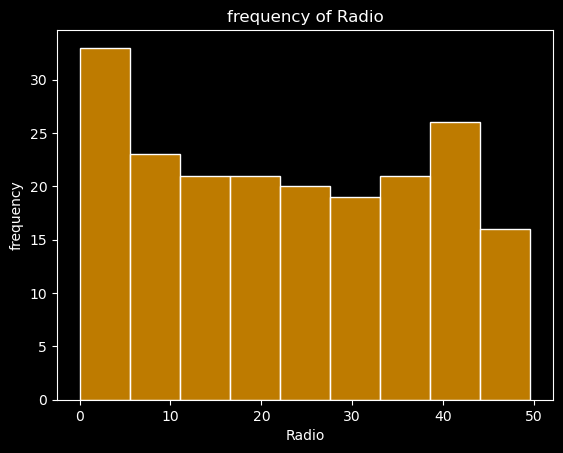

In [30]:
sns.histplot(x = 'Radio', data= data, color = 'orange')
plt.xlabel('Radio')
plt.ylabel('frequency')
plt.title('frequency of Radio')
plt.show()

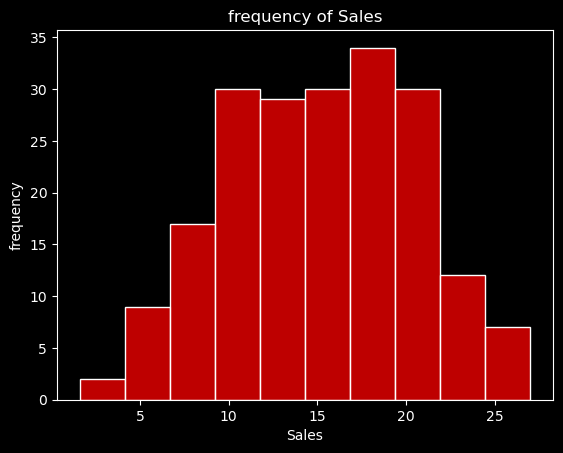

In [31]:
sns.histplot(x = 'Sales', data= data, color = 'red')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.title('frequency of Sales')
plt.show()

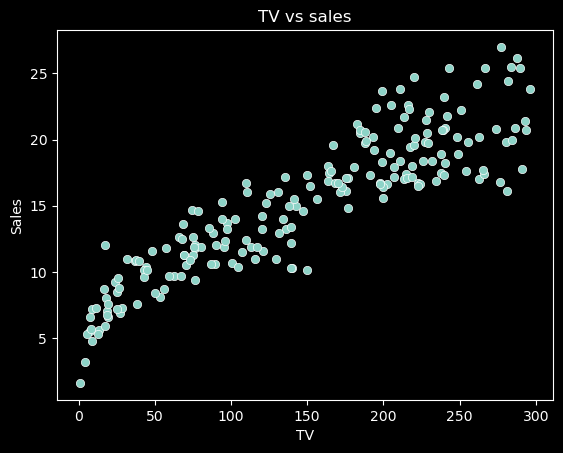

In [15]:
sns.scatterplot(x= 'TV', y = 'Sales', data = data)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs sales')
plt.show()

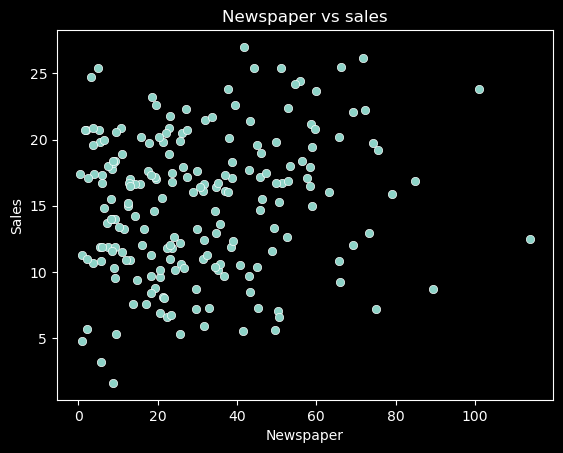

In [16]:
sns.scatterplot(x= 'Newspaper', y = 'Sales', data = data)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs sales')
plt.show()

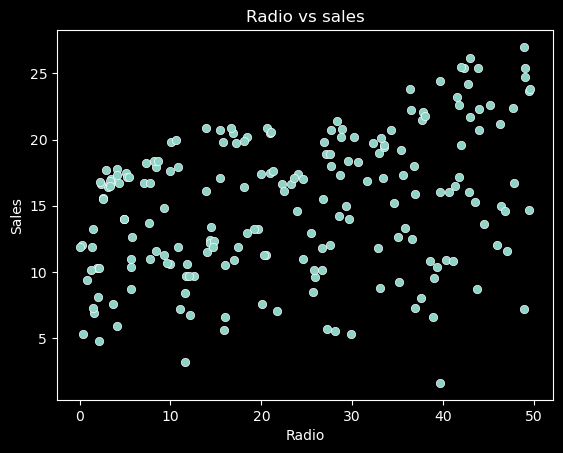

In [17]:
sns.scatterplot(x= 'Radio', y = 'Sales', data = data)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs sales')
plt.show()

box plot is used to identify the otliers in the data if any are present

<Axes: xlabel='Newspaper'>

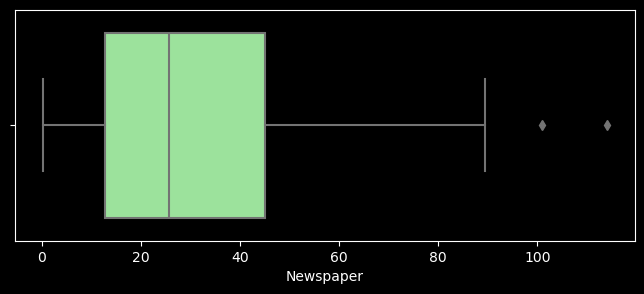

In [18]:
plt.figure(figsize = (8,3))
sns.boxplot(x = 'Newspaper', data = data, color= 'lightgreen')

<Axes: xlabel='TV'>

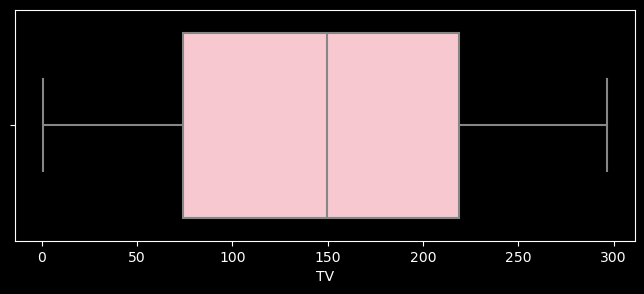

In [19]:
plt.figure(figsize = (8,3))
sns.boxplot(x = 'TV', data = data, color = 'pink')

<Axes: xlabel='Radio'>

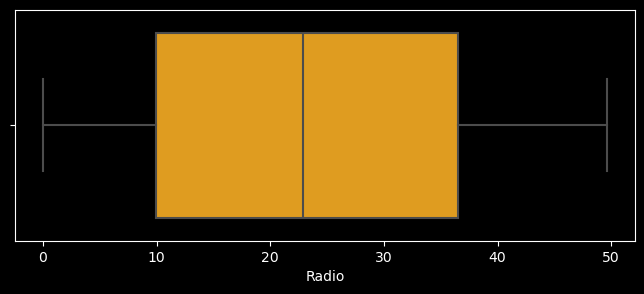

In [20]:
plt.figure(figsize = (8,3))
sns.boxplot(x = 'Radio', data = data, color = 'orange')

<Axes: xlabel='Sales'>

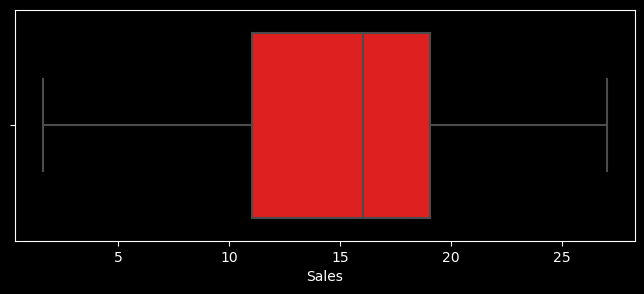

In [21]:
plt.figure(figsize= (8,3))
sns.boxplot(x = 'Sales', data = data, color = 'red')

# GRADIENT DECENT 
used to minimize the cost or loss function during model training

In [45]:
# Initialize parameters
def param_init(Y, num_features):
    '''
    Y = target variable
    num_features = number of features
    returns initialized values of theta
    '''
    theta = np.zeros(num_features + 1)
    theta[0] = Y.mean()
    return theta

# Generate predictions
def generate_predictions(theta, X):
    '''
    X = independent variable matrix
    returns predictions generated by model with parameters theta
    '''
    predictions = X.dot(theta)
    return predictions

# Calculating cost
def compute_cost(predictions, Y):
    '''
    returns the mean squared error between predictions and Y
    '''
    cost = np.mean((predictions - Y) ** 2)
    return cost

# Update parameters
def gradients(predictions, Y, X):
    '''
    Returns gradients corresponding to each parameter in theta
    '''
    n = len(Y)
    gradients = (2/n) * X.T.dot(predictions - Y)
    return gradients

def param_update(theta_old, gradients, alpha):
    '''
    Update and return the new values of theta
    '''
    theta_new = theta_old - alpha * gradients
    return theta_new

def result(theta, X, Y, cost, predictions, i, max_iter):
    '''
    print and plot the final result obtained from gradient descent
    '''
    if i < max_iter - 1:
        print("***** Gradient Descent has converged at iteration {} *****".format(i))
    else:
        print("***** Result after", max_iter, 'iterations is: *****')

    print("Final parameters (theta):", theta)
    print("Final cost:", cost)

    features = ['TV', 'Radio', 'Newspaper']
    for j in range(1, X.shape[1]):
        plt.figure(figsize=(14, 7), dpi=120)
        plt.scatter(X[:, j], Y, color='red', label='data points')
        label = 'final regression line: theta = {}'.format(str(theta))
        predictions_line = theta[0] + theta[j] * X[:, j]
        plt.plot(X[:, j], predictions_line, color='green', label=label)
        plt.xlabel(features[j-1])
        plt.ylabel('Sales')
        plt.title(f'Final regression line for {features[j-1]}')
        plt.legend()
        plt.show()

Sales = data['Sales']
TV = data['TV']
Radio = data['Radio']
Newspaper = data['Newspaper']

sample_data = pd.DataFrame({'Sales': Sales, 'TV': TV, 'Radio': Radio, 'Newspaper': Newspaper})

After Iteration 0 : theta = [-2.97795122e-16  1.80241583e-02  6.99262194e-03  3.15920052e-03] ; Cost = 1.0000000000000002
After Iteration 20 : theta = [-2.93931546e-16  3.09873734e-01  1.14505215e-01  4.34862709e-02] ; Cost = 0.483491019924788
After Iteration 40 : theta = [-2.88585822e-16  5.02726962e-01  1.79050855e-01  5.60745853e-02] ; Cost = 0.2658332101671702
After Iteration 60 : theta = [-2.81447088e-16  6.30457461e-01  2.18678575e-01  5.55390128e-02] ; Cost = 0.17219985441317187
After Iteration 80 : theta = [-2.78033152e-16  7.15227636e-01  2.43676657e-01  4.95020102e-02] ; Cost = 0.13117057962609946
After Iteration 100 : theta = [-2.78105317e-16  7.71586834e-01  2.59938329e-01  4.17895913e-02] ; Cost = 0.11289045466158264
After Iteration 120 : theta = [-2.77794454e-16  8.09115541e-01  2.70865670e-01  3.42022106e-02] ; Cost = 0.10461960314701516
After Iteration 140 : theta = [-2.77894374e-16  8.34139388e-01  2.78445655e-01  2.74868435e-02] ; Cost = 0.10082164181040927
After Iter

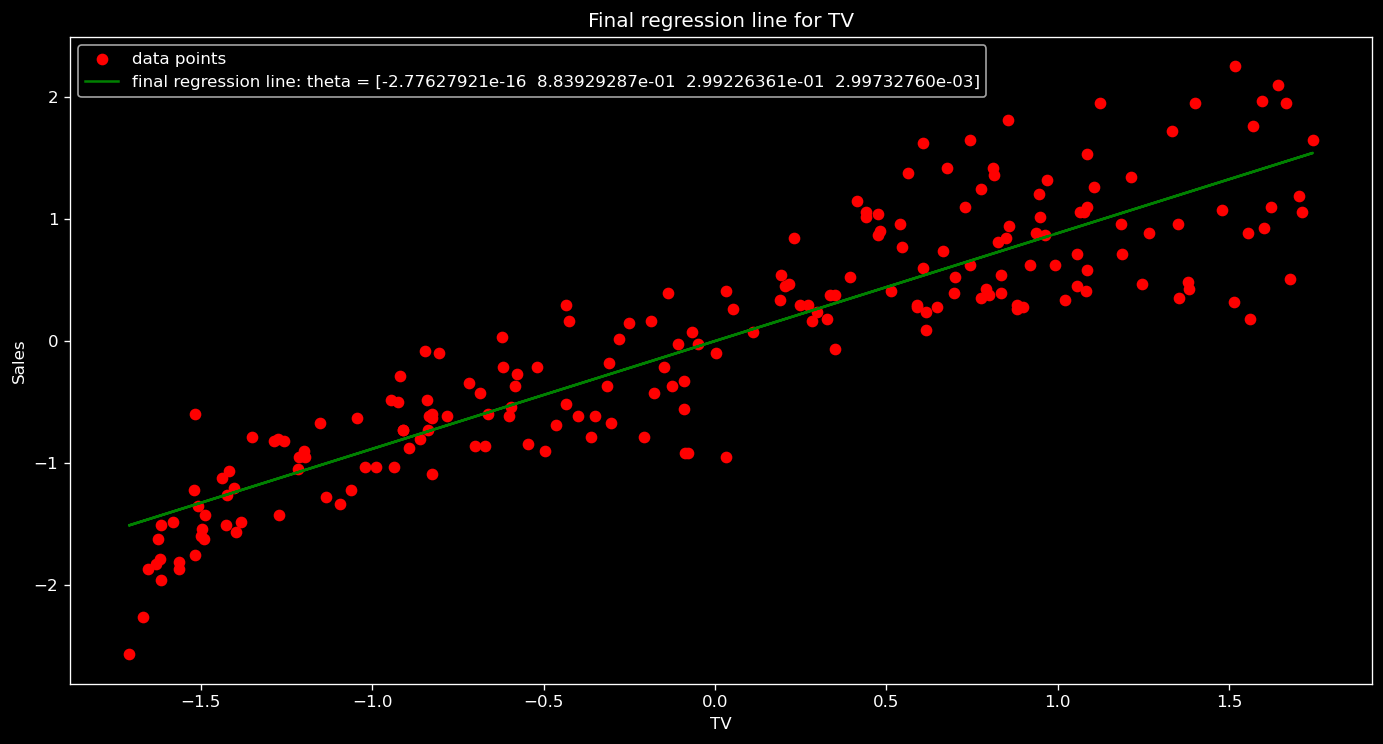

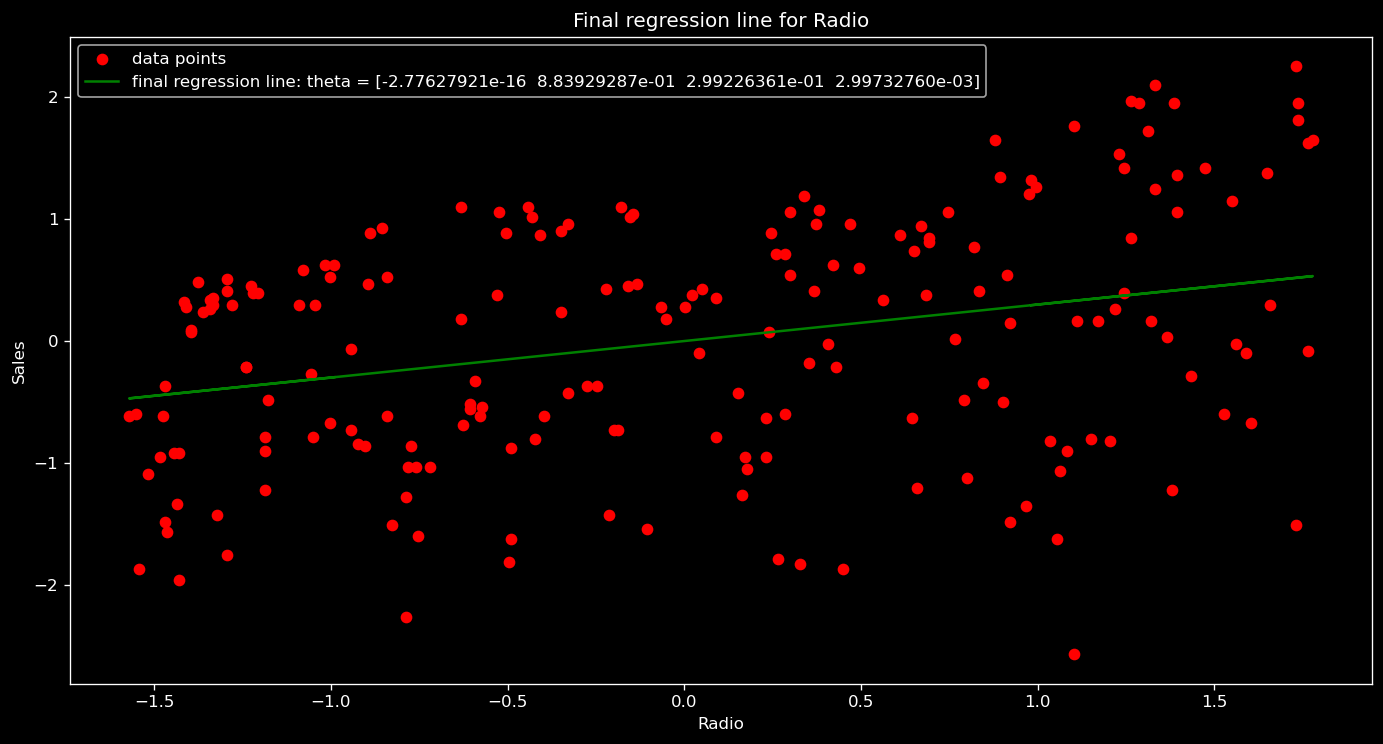

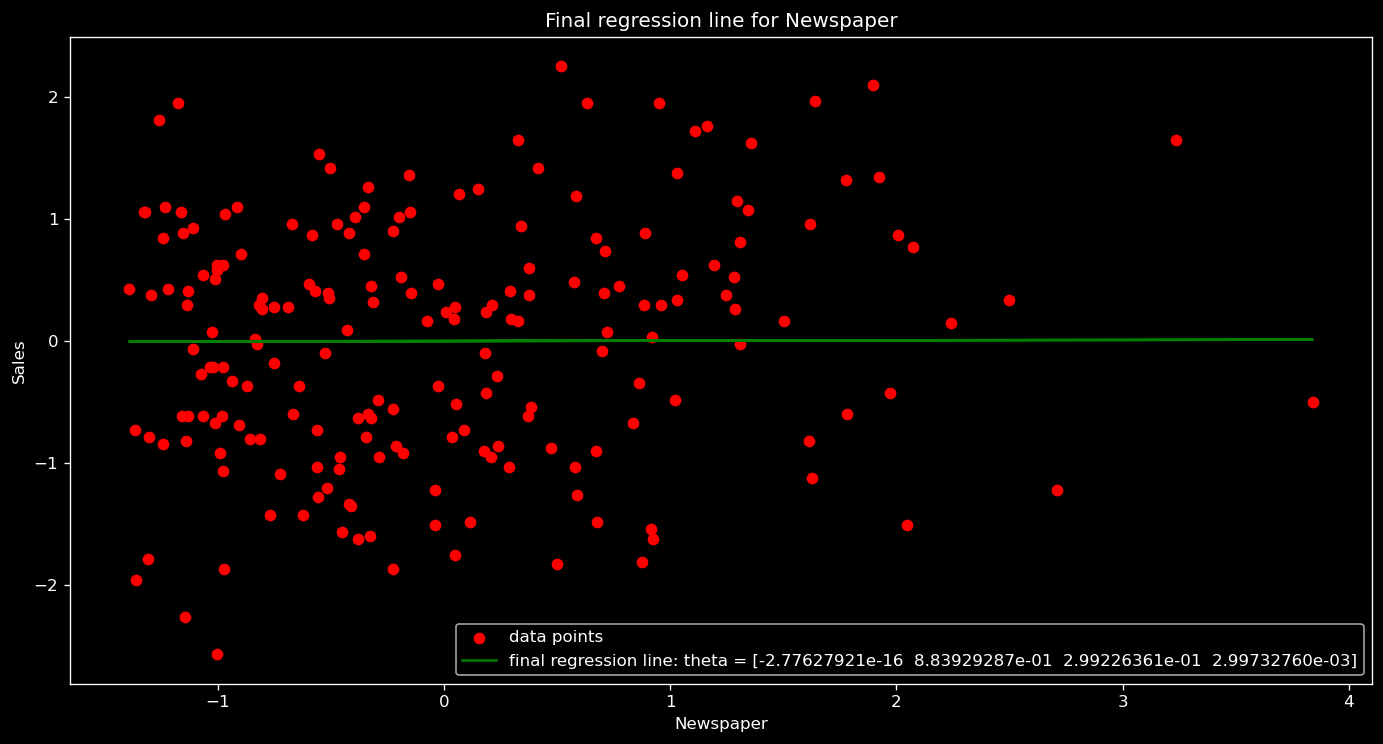

In [57]:
# Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sales = scaler.fit_transform(sample_data['Sales'].values.reshape(-1, 1)).flatten()
TV = scaler.fit_transform(sample_data['TV'].values.reshape(-1, 1)).flatten()
Radio = scaler.fit_transform(sample_data['Radio'].values.reshape(-1, 1)).flatten()
Newspaper = scaler.fit_transform(sample_data['Newspaper'].values.reshape(-1, 1)).flatten()

# Prepare the feature matrix X and target vector Y
X = np.column_stack((TV, Radio, Newspaper))
X = np.column_stack((np.ones(X.shape[0]), X))  # Add a column of ones for the intercept term
Y = Sales

# Declare parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

# Step 1: Initialize the values of theta
theta = param_init(Y, X.shape[1] - 1)

# Gradient descent in action
for i in range(max_iter):
    # Step 2: Generate predictions
    predictions = generate_predictions(theta, X)

    # Step 3: Calculate cost
    cost_new = compute_cost(predictions, Y)

    # Check if GD converged
    if abs(cost_new - cost_old) < 10**(-7):
        break

    # Calculate gradients
    grads = gradients(predictions, Y, X)

    # Step 4: Update parameters theta
    theta = param_update(theta, grads, alpha)

    # Display result after 20 iterations
    if i % 20 == 0:
        print('After Iteration', i, ': theta =', theta, '; Cost =', cost_new)

    # Update cost_old
    cost_old = cost_new

# Final results
result(theta, X, Y, cost_new, predictions, i, max_iter)


the values closest to the regression line are of the TV column followed by Radio and Newspaper and we have seen this result with the histograms as well

# DATA SPLITTING

In [58]:
# seprating the dependent and independent variables
X = data.drop(columns = ['TV', 'Newspaper', 'Radio'])
Y = data['Sales']

In [59]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [60]:
# splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split as tts 
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

# LINEAR REGRESSION MODEL

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()

# normalizing training data
x_train_scaled = scaler.fit_transform(x_train)

# Fit the LinearRegression model with normalized data
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [62]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.9981956314621636

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.05575697262453744
R^2 Score: 0.9981956314621636


# DECISION TREES MODEL

In [64]:
from sklearn.tree import DecisionTreeRegressor as DTR 
model = DTR()

In [65]:
model.fit(x_train, y_train)
predicted_values = model.predict(x_train)

In [66]:
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  99.96116643096848


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.05575697262453744
R^2 Score: 0.9981956314621636
